In [1]:
#Import all the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# I - Virat Kohli Dataset

In [2]:
df = pd.read_csv("virat.csv")

Before we start solving questions, let us first clean the data 

In [3]:
#runs have a * in some values denoting he was not out in that match, 
#this is making the column as object type and not int or float
#let us first clean it
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 12 columns):
Runs          132 non-null object
Mins          132 non-null object
BF            132 non-null int64
4s            132 non-null int64
6s            132 non-null int64
SR            132 non-null object
Pos           132 non-null int64
Dismissal     132 non-null object
Inns          132 non-null int64
Opposition    132 non-null object
Ground        132 non-null object
Start Date    132 non-null object
dtypes: int64(5), object(7)
memory usage: 12.5+ KB


In [4]:
#cleaning runs column
df['Runs']= df['Runs'].apply(lambda x: int(x[:-1]) if x[-1]=="*" else int(x))

### 1. Spread in Runs
Question 1: Analyse the spread of Runs scored by Virat in all his matches and report the difference between the scores at the 50th percentile and the 25th percentile respectively.

a)16.5

$ \color{green} {b) 22.5}$
    
c)26.5

d)32.5



In [5]:
#Solution to Q1
df['Runs'].describe(percentiles = [0.25,0.5,1])

#we called the describe function only on the slice of whole df

count    132.000000
mean      46.848485
std       41.994635
min        0.000000
25%       10.000000
50%       32.500000
100%     154.000000
max      154.000000
Name: Runs, dtype: float64

As you can see, answer will be __32.5-10= 22.5__

### 2. False Statement

Q2:Consider the following statements and choose the correct option

I - Virat has played the maximum number of matches in 2011
 
II - Virat has the highest run average in the year 2017
 
III - Virat has the maximum score in a single match and the highest run average in the year 2016.


Which of the above statements is/are false?

a) I and II

b) I and III

$ \color{green} {c)\,II}$

d) III



In [6]:
#Solution for Q2
#first we use only last two char in the string of Start Date to get the year
df['Start Date']= df['Start Date'].apply(lambda x: (x[-2:]))
#use value_counts()
df['Start Date'].value_counts()

11    31
13    23
14    17
10    16
12    11
16    10
15    10
09     6
08     5
17     3
Name: Start Date, dtype: int64

Clearly statement I is __True__

In [7]:
#to check statement II we do
pd.pivot_table(df, values='Runs',columns=['Start Date'], aggfunc=np.mean)


Start Date,08,09,10,11,12,13,14,15,16,17
Runs,31.8,38.333333,45.375,42.0,40.363636,47.826087,58.529412,30.4,73.9,61.666667


We see mean of year 17 is 2nd highest, his average is more in 2016. Statement II is __False__

In [8]:
#we find the max_score he has
max_runs=max(df['Runs'])
#extract the match whose score is max_runs
df[df['Runs']==max_runs]

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
126,154,202,134,16,1,114.92,3,not out,2,v New Zealand,Mohali,16


We see this was in year 2016 and hence statement III is __True__

### 3. Highest Frequency
Q3:Next, Next, from the following options choose the range in which he has scored more frequently or highest number of times.


$ \color{green} {a)\,[72,\, 83)}$

b) [83, 91)

c) [92, 102)

d) He has scored an equal number of times in all the above run brackets.



In [9]:
#Solution for Q3
#for (a)
len(df[(df['Runs']>=72) & (df['Runs']<83)])

6

In [10]:
#for (b)
len(df[(df['Runs']>=83) & (df['Runs']<91)])

4

In [11]:
#for (c)
len(df[(df['Runs']>=92) & (df['Runs']<102)])

4

Clearly option __(a)__ is the right answer

### 4. Maximum Frequency

Q4:Plot a histogram for the Mins column with 15 bins and report the range having the maximum frequency amongst the given options

a) [54.6,68)

b) [68,81.4)

$ \color{green} {c)\,[121.6,\,135)}$

d) All the bin ranges have the same frequency


In [12]:
#First we will have to clean the Mins column
# - in a few matches indicate he didnt play in that match and hence the column is not being treated as int
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 12 columns):
Runs          132 non-null int64
Mins          132 non-null object
BF            132 non-null int64
4s            132 non-null int64
6s            132 non-null int64
SR            132 non-null object
Pos           132 non-null int64
Dismissal     132 non-null object
Inns          132 non-null int64
Opposition    132 non-null object
Ground        132 non-null object
Start Date    132 non-null object
dtypes: int64(6), object(6)
memory usage: 12.5+ KB


In [13]:
df=df[~(df['Mins']== "-")]
df['Mins'] = df['Mins'].apply(lambda x: int(x))

#check info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126 entries, 0 to 131
Data columns (total 12 columns):
Runs          126 non-null int64
Mins          126 non-null int64
BF            126 non-null int64
4s            126 non-null int64
6s            126 non-null int64
SR            126 non-null object
Pos           126 non-null int64
Dismissal     126 non-null object
Inns          126 non-null int64
Opposition    126 non-null object
Ground        126 non-null object
Start Date    126 non-null object
dtypes: int64(7), object(5)
memory usage: 12.8+ KB


(array([28., 13., 12.,  9.,  6.,  6.,  9.,  4.,  9., 11.,  4.,  6.,  3.,
         2.,  4.]),
 array([  1. ,  14.4,  27.8,  41.2,  54.6,  68. ,  81.4,  94.8, 108.2,
        121.6, 135. , 148.4, 161.8, 175.2, 188.6, 202. ]),
 <a list of 15 Patch objects>)

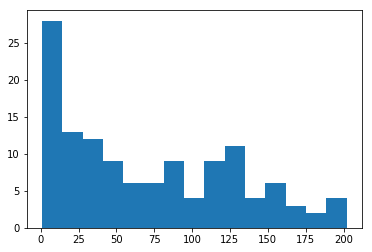

In [14]:
#Solution for Q4
plt.hist(df.Mins, bins = 15)
#note that not writing plt.show() displays the whole text, the twi arrays displayed below
#are the values plotted in the histogram below
#this can also be done by collecting the two returned values as shown below 

Clearly the range __[125.6, 135)__ has highest frequence among the option provided

[28. 13. 12.  9.  6.  6.  9.  4.  9. 11.  4.  6.  3.  2.  4.]
[  1.   14.4  27.8  41.2  54.6  68.   81.4  94.8 108.2 121.6 135.  148.4
 161.8 175.2 188.6 202. ]


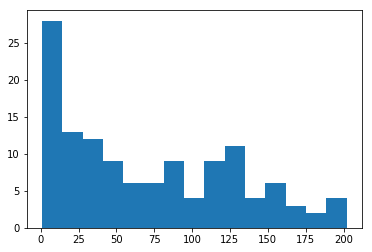

In [15]:
#collecting returns from plt.hist
freq = plt.hist(df.Mins, bins = 15)
print(freq[0])
print(freq[1])
#the first array is the frequencies and second array is the bins


### 5. Correct Statements
Q5:Using the modified dataset from the previous question(i.e. It doesn’t contain the rows having an incorrect Mins value), plot box plots of the runs scored by Virat in matches against Sri Lanka, Australia and England. Now consider the following statements:

      1 - Virat has scored pretty similarly against both Australia and England.
      2 - The highest score by Virat is against Sri Lanka.
      3 - Amongst the three countries, the highest value at the upper fence occurs for Sri Lanka.
      4 -Australia’s IQR is the widest.

  Which of the above statements are correct?
  
       a) 1, 2 and 4
       b) 1, 2 and 3
       c) 2 and 4
       d) 1 and 2



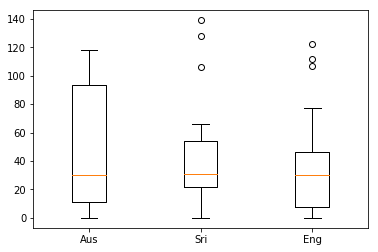

In [16]:
#We slice the DF with condition on Opposition column and analyse all
Aus=np.array(df[df['Opposition']=="v Australia"]['Runs'])
Sri = np.array(df[df['Opposition']== "v Sri Lanka"]['Runs'])
Eng = np.array(df[df['Opposition']== "v England"]['Runs'])

#after getting all the runs against Aus Sri and Eng, we plot the box plot
plt.boxplot([Aus, Sri, Eng])
plt.xticks((1,2,3),["Aus", "Sri", "Eng"])
plt.show()

### 6. True Statements
Q6) From the same modified dataset as the previous question, create both box plot and histogram(take the number of bins as 3) as sub-plots for all the run scores in which the mode of dismissal was ‘lbw’. Now consider the following statements:

I - The box-plot shows one outlier lying outside the fence at the score of 75

II - The maximum frequency of scores lie between [20-41)

III- The median score lies between 30-40

Which of the above statements is/are true?

a) I

b) I and II

$ \color{green} {c)\,II}$

d) II and III

In [17]:
# Solution for Q6
#we slice all the rows where Dismissal was by lbw and take runs of those rows
lbw = np.array(df[df['Dismissal']== "lbw"]['Runs'])
lbw

array([12, 31, 54,  0, 35, 20, 23, 61, 23], dtype=int64)

(array([3., 4., 2.]),
 array([ 0.        , 20.33333333, 40.66666667, 61.        ]),
 <a list of 3 Patch objects>)

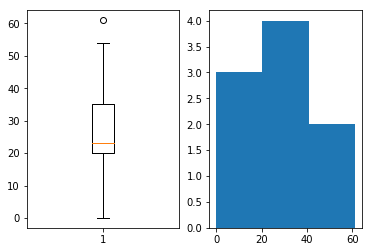

In [18]:
#we plot box plot and histogram
fig, ax = plt.subplots(ncols=2)

ax[0].boxplot(lbw)
ax[1].hist(lbw,bins = 3)

Statement I is __False__ because Fece at about 55, not at 75

Statement II is __True__

Statement III is __False__ as median is between 20-30

# II -  Discounts dataset 

In [19]:
df2 = pd.read_csv("spd.csv")

### 1. Null Values
Q1. Find the number of null values in each of the columns and delete all the entries having null values.
    
a) Sales - 17; Profits - 19; Discounts - 22

b) Sales - 17; Profits - 22; Discounts - 19

$ \color{green} {c)\,Sales\,-\,19;\,Profits\,-\,22;\,Discounts\,-\,17}$

d) Sales - 22; Profits - 19; Discounts - 17


In [20]:
#Solution for Q1
#find the null values using isnull().sum()
df2['Sales'].isnull().sum()
#similarly find others as well

19

### 2. Incorrect Statements
Q2. After you’ve removed the null values, clean the Sales column by replacing the bogus entries with the correct ones. After that, create a box-plot of all the products with Sales greater than 3000, and then consider the following statements:

    I- The median value comes out to be between 2500-5000.
    II- There are no outliers, i.e., values outside either fence for this box plot.
    III- There are 3 entries having a Sales value greater than 15000.

Which of the above statements is/are incorrect?

a) I

$ \color{green} {b)\,II\,and\,III}$

c) III

d) I and II


 

Before moving on we first clean the values in Sales

For this we will use a function called cleaner and pass it in apply

In [21]:
#drop all na values from all 3 columns
df2=df2.dropna(axis=0, how="any")

In [22]:
#this function is like a filter that will remove all the non allowed values from the string and return a float
def cleaner(string):
    clean_str="".join(filter(lambda x: (x in "0123456789."), string))
    return float(clean_str)

In [23]:
df2['Sales']=df2['Sales'].apply(cleaner)

In [24]:
Sales=df2[df2['Sales']>3000]['Sales']

{'whiskers': [<matplotlib.lines.Line2D at 0x255b79c57b8>,
 'caps': [<matplotlib.lines.Line2D at 0x255b79c5128>,
 'boxes': [<matplotlib.lines.Line2D at 0x255b79c5ac8>],
 'medians': [<matplotlib.lines.Line2D at 0x255b79d89b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x255b79d8dd8>],
 'means': []}

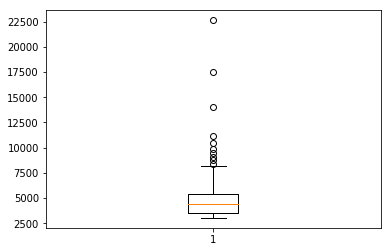

In [25]:
plt.boxplot(Sales)

Clearly Statement II and III are False

### 3. Box Plot
Q3. Now that you’ve cleaned the bogus entries from the Sales column, go ahead and clean the Profits column as well. After that, create a boxplot of all the values that have Profits greater than 2000 and report back the approximate median value.
    
a) 3500

b) 4500

$ \color{green} {c)\,2800}$

d) 5500


In [26]:
#We will use the same cleaner function here to clean profit, but in this case
#there are negative profits as well, so we will have to change the allowed string
#this function is like a filter that will remove all the non allowed values from the string and return a float
def Profit_cleaner(string):
    clean_str="".join(filter(lambda x: (x in "0123456789.-"), string))
    return float(clean_str)

In [27]:
#We use Profit_cleaner to clean Profits 
df2['Profits']=df2['Profits'].apply(Profit_cleaner)
#Slice the series of Profits >2000 and use describe to get the median, you may also use median() functionality
Profit=df2[df2['Profits']>2000]['Profits']
Profit.describe()
#the median is at 50%

count      15.000000
mean     3751.289327
std      1868.702550
min      2229.024000
25%      2383.473750
50%      2799.984000
75%      4788.422750
max      8399.976000
Name: Profits, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x255b8144898>,
 'caps': [<matplotlib.lines.Line2D at 0x255b8144cc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x255b81450f0>],
 'medians': [<matplotlib.lines.Line2D at 0x255b8144358>],
 'fliers': [<matplotlib.lines.Line2D at 0x255b8142048>],
 'means': []}

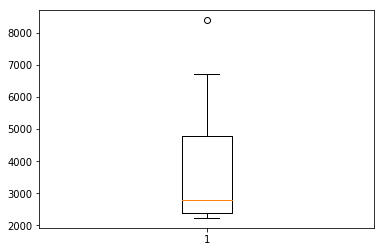

In [28]:
#plotting box plot
plt.boxplot(Profit)

Clearly the median is 2799.98=__2800__

### 4. Clean Data

Q4. Once you have cleaned this column, report back the total number of times either a discount of 0.5, 0.1 or 0.6 was given.

a) 134

b) 182

c) 284

$ \color{green} {d)\,296}$


In [29]:
#Solution to Q4
#first we clean discounts using cleaner
df2['Discounts']=df2['Discounts'].apply(cleaner)
df2['Discounts'].value_counts()

0.00    4767
0.20    3640
0.70     413
0.80     300
0.30     227
0.40     205
0.60     137
0.10      93
0.50      66
0.15      52
0.32      26
0.45      11
Name: Discounts, dtype: int64

In [30]:
#we can manually sum the values at 0.1, 0.5 and 0.6
#or do this
len(df2[ (df2['Discounts']==0.5) | (df2['Discounts']==0.1) | (df2['Discounts']==0.6)])

296